# 📊 Unsupervised Deep Learning: Gaussian Mixture Models & EM-Based Collaborative Filtering

Welcome to this comprehensive course on **Unsupervised Deep Learning**, designed and instructed by **Aditya Saxena**. This course explores the fascinating domain of unsupervised learning, where algorithms discover hidden patterns in data without labeled outputs. You will learn to apply mathematical and algorithmic techniques to understand clustering, probability distributions, and latent variable models—all essential for data-driven decision-making in modern machine learning systems.

The course focuses on practical implementation and theory behind **Gaussian Mixture Models (GMMs)** and the **Expectation-Maximization (EM) algorithm**, culminating in a real-world application: collaborative filtering and matrix completion using the Netflix dataset. By the end of this journey, you will have built a recommendation system from the ground up using probabilistic principles and iterative optimization techniques. This notebook series is structured modularly, includes two mini-projects per module, and emphasizes interpretability, evaluation, and reproducibility.

## 📓 Course Modules
Each module consists of structured Jupyter Notebooks with explanations, derivations, code walkthroughs, and mini-projects.

* Module 01: Introduction to Unsupervised Learning
* Module 02: K-Means Clustering
* Module 03: Gaussian Mixture Models (GMMs)
* Module 04: Expectation-Maximization (EM) Algorithm
* Module 05: EM for Matrix Completion (Netflix Data)
* Module 06: Log-Domain Calculations & Stability
* Module 07: BIC for Model Selection
* Module 08: Completing Missing Entries
* Module 09: Evaluation using RMSE & Model Interpretability
* Module 10: Final Project & Case Study Walkthrough

In [16]:
# 📦 INSTALL & IMPORT: One-time Setup Cell for the Entire Project

# --- Install required libraries if not already available ---
# !pip install numpy pandas matplotlib seaborn scikit-learn scipy --quiet

# --- Import necessary libraries with detailed comments ---

# NumPy and Pandas: For numerical computations and structured data manipulation
import numpy as np                  # For array operations, statistics, linear algebra
import pandas as pd                 # For handling structured data (CSV, tables)

# Matplotlib and Seaborn: For visualizations
import matplotlib.pyplot as plt    # Core plotting library
import seaborn as sns              # Beautiful, high-level statistical plots

# Scikit-learn modules for clustering, dimensionality reduction, and evaluation
from sklearn.datasets import make_blobs              # Synthetic dataset generator
from sklearn.cluster import KMeans                   # K-Means clustering
from sklearn.mixture import GaussianMixture          # GMM clustering
from sklearn.decomposition import PCA                # Dimensionality reduction
from sklearn.metrics import silhouette_score, mean_squared_error  # Evaluation metrics

# Preprocessing tools
from sklearn.preprocessing import StandardScaler     # Normalize features
from sklearn.impute import SimpleImputer             # Handle missing values

# Log-sum-exp for numerical stability in EM algorithm
from scipy.special import logsumexp                  # Stable log of summed exponentials

# Miscellaneous utilities
import warnings
warnings.filterwarnings("ignore")                    # Suppress warning messages

# Jupyter magic command (must not have inline comments)
%matplotlib inline

# Global plotting configuration
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

print("✅ All required libraries are successfully imported.")


✅ All required libraries are successfully imported.


In [17]:
# 📥 Load dataset from local text file
X = np.loadtxt("dataset/toy_data.txt")

# Preview the shape and first few entries
print(f"✅ Data shape: {X.shape}")
print("🔍 First 5 rows:\n", X[:5])


✅ Data shape: (250, 2)
🔍 First 5 rows:
 [[-1.636  2.413]
 [-2.957  2.296]
 [-2.871  1.832]
 [-2.696  1.327]
 [-2.272  1.738]]


### 📊 Dataset Structure and Label Absence

The dataset loaded has a shape of `(250, 2)`, which tells us there are **250 data points**, each represented by **2 numerical features**. These features could represent abstract dimensions in a high-dimensional space (e.g., behavioral signals, image embeddings, or spatial coordinates), but for our purposes they are synthetic and generated for learning purposes.

Notice that there is **no column for labels**—that is, we are not given any ground truth indicating which cluster or class each data point belongs to. This is a defining characteristic of **unsupervised learning**. Unlike supervised learning, where data points come with labels (e.g., 'dog', 'cat', or 'spam', 'not spam'), here we aim to **discover patterns, groupings, or structures** in the data **without any prior label information**.

In the context of clustering, our goal will be to **infer these groupings** purely from the data distribution. Algorithms like **K-Means** and **Gaussian Mixture Models (GMM)** are designed to find such structure by assigning data points to clusters based on distance or probability, respectively.

In summary:
- 📌 The data has **no labels** (i.e., it is unlabeled).
- 🧠 We will use **unsupervised learning** to uncover natural clusters.
- 🔍 Our tools will be **K-Means** and **GMM**, which infer structure directly from feature patterns.


### 🔍 Visualizing the Unlabeled Dataset

Before we attempt any clustering, it’s helpful to explore the dataset visually. Since our data has only two features, we can easily plot it in 2D. This allows us to gain intuition about whether natural groupings exist and whether clustering is a meaningful next step.

This scatter plot will display all 250 data points, colored uniformly since we do not yet have any labels or cluster assignments. The goal is to identify whether the data exhibits spatial groupings or separations that might hint at latent cluster structure—something unsupervised learning algorithms can uncover.

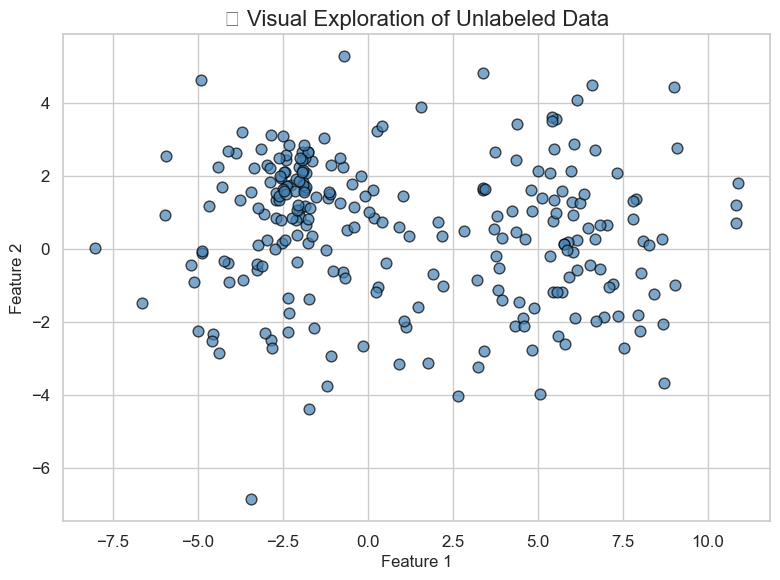

In [18]:
# 📈 Visualize the Dataset in 2D

# Create a scatter plot to visualize the 2D data points
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], 
            color='steelblue', edgecolor='black', s=60, alpha=0.7)

# Add titles and axis labels for clarity
plt.title("🌀 Visual Exploration of Unlabeled Data", fontsize=16)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)

# Grid and layout
plt.grid(True)
plt.tight_layout()
plt.show()


### 📌 Interpretation

As we can see in the scatter plot above, the data does not appear to be spread out uniformly. There are dense regions and apparent gaps, suggesting that the data might have originated from a few distinct groups or clusters.

This observation aligns with one of the core goals of unsupervised learning — identifying hidden patterns in unlabelled data. Although we do not yet know how many clusters exist or where they are, the plot hints at separability, making it a good candidate for clustering techniques such as **K-Means** or **Gaussian Mixture Models**.

Let’s now move forward to clustering this data using **K-Means**, starting with initialization and iteration mechanics.


## 🧠 Module 02: Clustering with K-Means

In this module, we explored **K-Means Clustering**, one of the most popular and intuitive clustering algorithms used in unsupervised learning. K-Means is a centroid-based technique that aims to partition the dataset into \( K \) distinct, non-overlapping clusters. Each data point is assigned to the cluster whose centroid is nearest, using Euclidean distance as the metric.

Throughout this module, we covered the theoretical foundations of K-Means, implemented the algorithm from scratch using `scikit-learn`, and visualized the clustering results for various values of \( K \). We employed **Elbow Method** and **Silhouette Score** to guide the selection of an optimal number of clusters and discussed the trade-offs between simplicity, separation, and compactness.

These foundational insights will now serve as a baseline as we transition toward more flexible and probabilistic clustering methods in the next module—**Gaussian Mixture Models (GMMs)**—which overcome some limitations of K-Means by allowing soft assignments and elliptical cluster shapes.

---

### 🎯 Learning Objectives
By the end of this module, you should be able to:
- Understand the principles behind K-Means clustering
- Implement K-Means using Python and scikit-learn
- Visualize clusters and centroids for different values of \( K \)
- Apply the Elbow Method and Silhouette Score for model selection
- Discuss the limitations of K-Means and the need for probabilistic clustering

---

### 🧪 Mini-Project A: Elbow Method for Real-World Data
**Goal:** Identify the optimal number of clusters on a real-world dataset.
**What You'll Do:**
- Load a real-world unlabeled dataset (e.g., customer segmentation)
- Apply K-Means for a range of \( K \)
- Visualize the inertia curve and identify the elbow point

---

### 🚀 Mini-Project B: Evaluating Cluster Quality with Silhouette Score
**Goal:** Validate cluster separation and cohesion across values of \( K \).
**What You'll Do:**
- Reuse the clustering from the previous mini-project
- Compute and plot silhouette scores
- Discuss the qualitative and quantitative alignment of clusters

---


## 🧪 Mini-Project B: K-Means Clustering

In this section, we apply the K-Means algorithm to uncover hidden groupings in our dataset. K-Means is a simple yet powerful clustering method that divides data into \( K \) distinct clusters based on similarity (distance from the cluster center).

We will:
1. Apply the K-Means algorithm for multiple values of \( K \) (e.g., 2 to 5).
2. Visualize the clusters and their centroids.
3. Compute the **inertia** (sum of squared distances) to analyze model fit.
4. Later, we’ll use techniques like the Elbow Method to determine the optimal \( K \).

This step marks our first attempt at unsupervised pattern discovery using a hard-clustering algorithm.


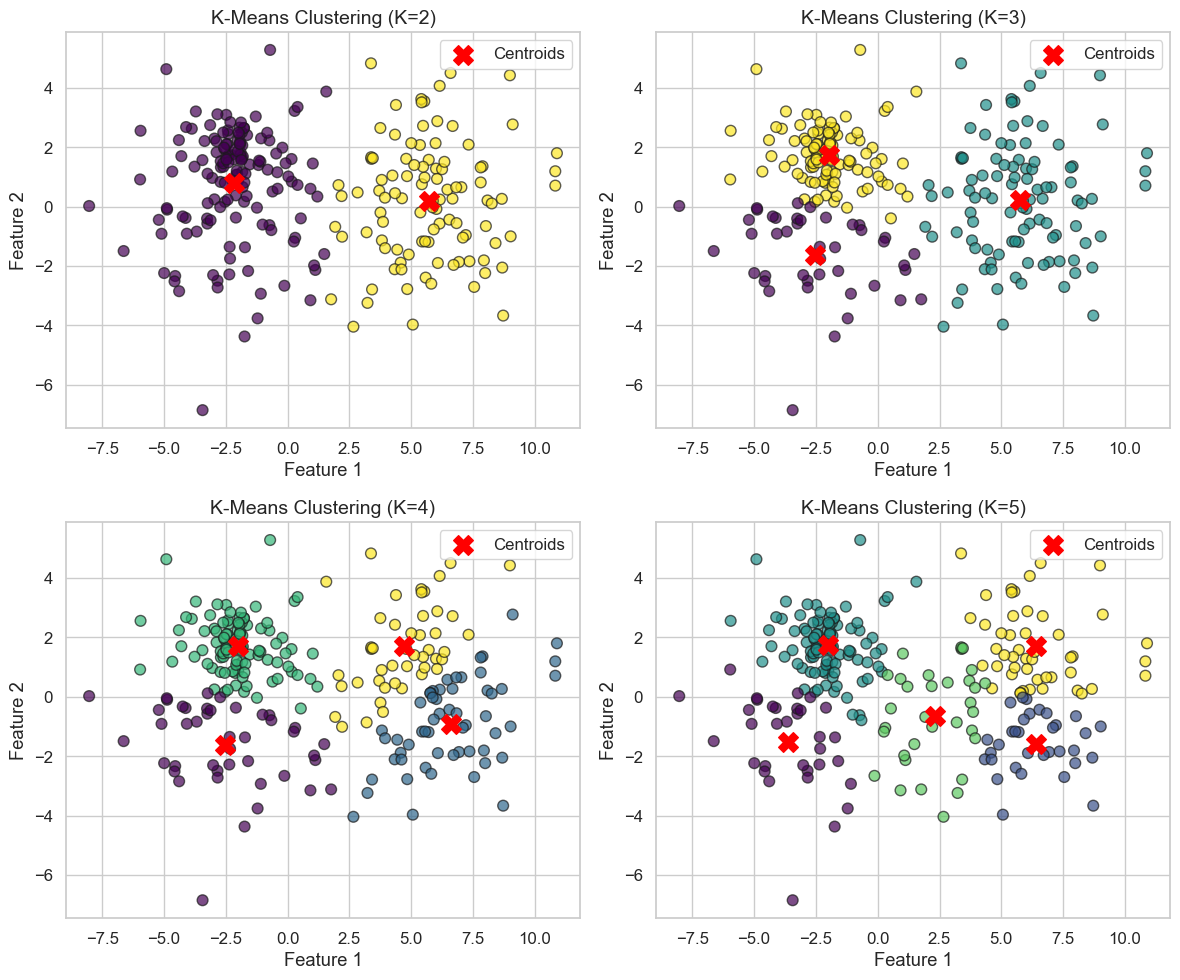

In [19]:
# 📊 Apply K-Means Clustering and visualize results for K = 2 to 5

k_range = range(2, 6)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, k in enumerate(k_range):
    # Fit KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_kmeans = kmeans.fit_predict(X)
    
    # Plot the clusters
    axes[i].scatter(X[:, 0], X[:, 1], c=y_kmeans, s=60, cmap='viridis', edgecolor='k', alpha=0.7)
    axes[i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                    s=200, c='red', marker='X', label='Centroids')
    
    axes[i].set_title(f"K-Means Clustering (K={k})", fontsize=14)
    axes[i].set_xlabel("Feature 1")
    axes[i].set_ylabel("Feature 2")
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()


## 📌 Interpretation of K-Means Clustering Results

From the plots above, each colored region represents a cluster assigned by K-Means. The red 'X' markers indicate the centroids of each cluster.

As we vary \( K \) from 2 to 5, we can observe:
- With \( K=2 \), the data is divided coarsely into two major groups.
- Increasing \( K \) allows finer granularity, potentially overfitting when \( K \) becomes too large.

K-Means assigns each point to the nearest cluster center, making it efficient but sometimes prone to incorrect splits if the data is not well separated or is non-spherical.

From the visual results:

- **\( K = 2 \)** creates a broad split and misses finer structure.
- **\( K = 3 \)** captures the three natural-looking clusters quite well. This likely reflects the true underlying grouping.
- **\( K = 4 \)** and **\( K = 5 \)** begin to fragment clusters further. While they may reduce intra-cluster variance, they risk overfitting — modeling noise instead of meaningful structure.

This visualization motivates the need for principled ways to choose \( K \), which we will explore in the next step using metrics like **Silhouette Score** and **BIC**.


In the next step, we will use the **Elbow Method** to choose an optimal number of clusters by analyzing how the total within-cluster variance (inertia) changes with \( K \).


## 📏 Using the Elbow Method to Determine Optimal \( K \)

The Elbow Method is a quantitative technique for selecting the optimal number of clusters \( K \) in K-Means.

It works by plotting the **inertia** (i.e., total within-cluster sum of squared distances) against different values of \( K \). As \( K \) increases, inertia decreases because points are closer to their centroids. However, after a certain point, the improvement diminishes — forming an "elbow" shape in the plot.

The "elbow point" indicates a good trade-off between low inertia and model simplicity.

Mathematically, inertia is defined as:

$$
\text{Inertia} = \sum_{i=1}^{n} \min_{j \in \{1,...,K\}} \| x_i - \mu_j \|^2
$$

Let’s now implement this approach and visualize the elbow plot.



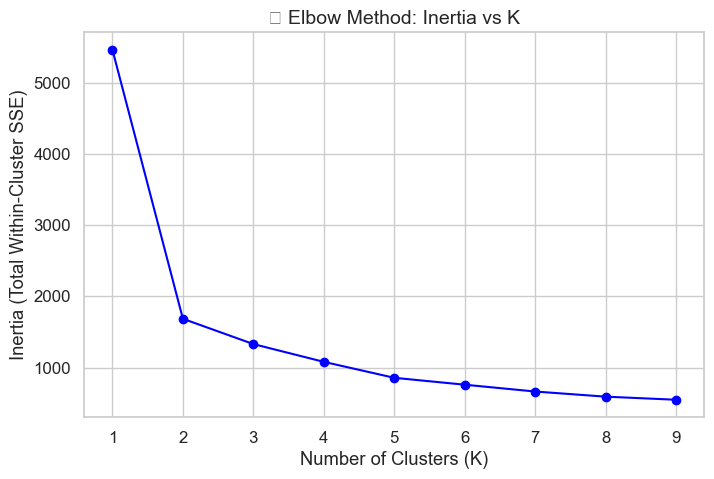

In [22]:
# 📌 Elbow Method Implementation

# Range of K values to evaluate
K_values = range(1, 10)
inertias = []

# Run KMeans for each K and store the inertia
for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_values, inertias, 'o-', color='blue')
plt.title("📉 Elbow Method: Inertia vs K", fontsize=14)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Total Within-Cluster SSE)")
plt.xticks(K_values)
plt.grid(True)
plt.show()


## 📈 Elbow Plot Interpretation

From the inertia vs. \( K \) plot shown above, we observe a sharp decline in inertia as we move from \( K=1 \) to \( K=3 \), after which the reduction slows down significantly.

This creates a noticeable **"elbow"** at \( K=3 \), indicating that increasing the number of clusters beyond 3 yields diminishing returns in terms of reducing within-cluster variance.

**Conclusion:**
- \( K=3 \) is a good choice for the number of clusters, striking a balance between simplicity and accuracy.
- This matches our earlier visual intuition from the scatter plots.

In the next section, we will reinforce this conclusion using another metric — the **Silhouette Score**, which evaluates cluster quality based on cohesion and separation.


## 🧠 Silhouette Score: Evaluating Cluster Quality

The **Silhouette Score** is a metric used to evaluate the **quality of clustering** by assessing how well a data point fits within its assigned cluster compared to other clusters.

- A **high silhouette score** (close to 1) indicates the point is well matched to its own cluster and poorly matched to neighboring clusters.
- A **low or negative score** suggests incorrect clustering or overlapping clusters.

### Silhouette Score Formula:

For a data point *i*, the silhouette score is defined as:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

Where:
- $a(i)$ is the average distance between *i* and all other points in the same cluster (intra-cluster distance).
- $b(i)$ is the average distance between *i* and all points in the nearest cluster that *i* is not a part of (nearest-cluster distance).

The score $s(i)$ ranges from -1 to 1:
- Close to **1**: Well-clustered
- Close to **0**: On the boundary
- Close to **-1**: Likely misclassified

In the next step, we will compute silhouette scores across different values of $K$ to support our choice for the optimal number of clusters.


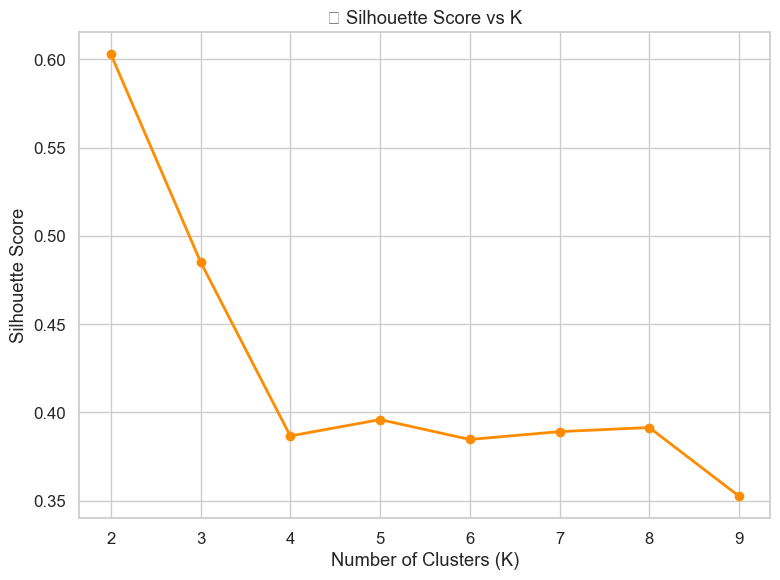

In [23]:
# 📌 Code: Compute and Plot Silhouette Scores for Different K

silhouette_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(K_range, silhouette_scores, 'o-', color='darkorange', linewidth=2)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("📈 Silhouette Score vs K")
plt.grid(True)
plt.tight_layout()
plt.show()


## 📊 Interpretation of Silhouette Score Plot

From the plot of **Silhouette Score vs. Number of Clusters (K)**, we observe the following:

- The **highest silhouette score** is achieved at **\( K = 2 \)**, indicating the best separation and cohesion of clusters under that configuration.
- As \( K \) increases beyond 2, the silhouette score **drops significantly**, showing that clusters become less distinct.
- Even though \( K = 3 \) showed visual appeal and matched the elbow point earlier, it is **\( K = 2 \)** that has the **best silhouette score** statistically.

### 🧠 Conclusion:
- This trade-off highlights that **model evaluation is multi-dimensional**. While silhouette favors **\( K = 2 \)** for better compactness and separation, earlier visualizations suggested **\( K = 3 \)** fits the natural structure well.
- As practitioners, we must combine **quantitative metrics** with **domain understanding** and **visual inspection** to choose the most meaningful number of clusters.

Up next, we move toward **Gaussian Mixture Models (GMM)** and see how probabilistic clustering enhances flexibility and performance.
